In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [14]:
path = r'./feature_selection/'
for i in os.listdir(path):
    if 'feature_selction_' in path:
        
        

['.ipynb_checkpoints',
 '07-21-sklearn-model_selection.ipynb',
 '07-22-feature_selection_visiualization.ipynb',
 '07-29 PUMD项目介绍.ipynb',
 '7-27.ipynb']

In [2]:
path = r'\feature_selection'
os.listdir(path)
df = pd.read_csv(path)

In [3]:
df

,round,binSize,type,score,del_fl
0,0,50,nat,0.881489,"1,2,3,4,7,8,10,11,12,14,15,16,17,19,20,22,23,2..."
1,0,50,pi,0.880309,"102,116,120,123,135,129,127,131,134,133,132,22..."
2,0,25,nat,0.860952,"93,94,95,96,97,98,99,100,101,102,103,104,105,1..."
3,0,25,pi,0.873430,"41,152,252,235,236,15,16,62,43,54,37,160,47,61..."
4,0,15,nat,0.867888,"110,111,112,113,116,118,120,121,123,125,127,12..."
...,...,...,...,...,...
75,7,15,pi,0.917004,"4,123,55,56,61,62,139"
76,7,10,nat,0.922301,"61,62,64,65,66,67,68,71,72,73"
77,7,10,pi,0.921212,"73,30,141,72,71,46,105,135,116,136"
78,7,5,nat,0.922457,"14,15,16,17,18"


In [4]:
binsizeDict = {
    50:"r",
    25:"c",
    15:"g",
    10:"y",
    5:"k"
}
typeDict = {
    'pi':"-d",
    'nat':":d"
}


In [5]:
org_score = 0.85606060

In [6]:
roundNum = np.unique(df["round"].to_list())

In [7]:
roundNum

array([0, 1, 2, 3, 4, 5, 6, 7])

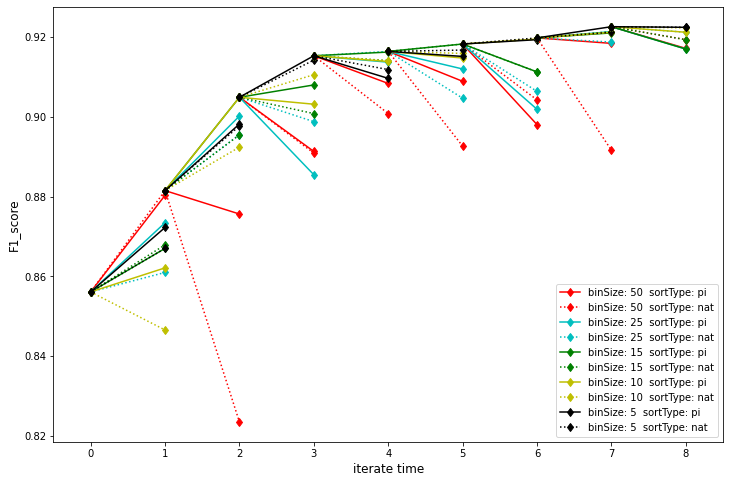

In [8]:
from collections import OrderedDict
fig=plt.figure(num=1,figsize=(12,8))
ax = fig.add_subplot(111)
for i in list(roundNum) :
    if i == 0:
        org_score = 0.85606060
    else:
        cnt = i - 1
        org_score = max(df[(df['round']==cnt)]['score'].to_list())
        
    for binSize in [50,25,15,10,5]:
        for Ctype in ['pi','nat']:
            tmpData = df[(df['round']==i) &( df['binSize']==binSize)&(df['type']==Ctype)]['score'].to_list()[0]
            y = [org_score,tmpData]
            x = [i,i+1]
            strType = binsizeDict[binSize]+typeDict[Ctype]
            ax.plot(x,y,strType,label = "binSize: "+str(binSize)+"  sortType: "+Ctype)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
# plt.legend(loc=3,labelspacing=0.5,handlelength=2,fontsize=10,shadow=False)
# iterate_time = [x+1 for x in list(roundNum)]
# ax.set_xticklabels(iterate_time)
plt.xlim(-0.5,(max(roundNum)+1.5))
ax.set_xlabel("iterate time",fontsize=12)#添加x轴坐标标签，后面看来没必要会删除它，这里只是为了演示一下。
ax.set_ylabel("F1_score",fontsize=12)#添加y轴标签，设置字体大小为16，这里也可以设字体样式与颜色

plt.show()          